In [35]:
#
# # Ensure we have the needed libraries installed
# 
%pip install --quiet requests
%pip install --quiet beautifulsoup4
%pip install --quiet nbformat

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Rob.Harrison\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Rob.Harrison\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Rob.Harrison\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [36]:
#
# # Access the ETL function 'library'
# 
%run ETL_func_defs.ipynb

****************************** ETL functions def file version v0.0.1 ******************************



In [37]:
#
# Core user-defined variables
#

urlBase = "https://www.o2.co.uk/shop/phones"
urlSub = "#sort=content.sorting.featured&page="

main_content_selector = ".device-info-content"
brand_selector = '[data-qa-device-title] [data-qa-device-brand]'
model_family_selector = '[data-qa-device-title] [data-qa-device-modelfamily]'
star_rating_selector = ".star-rating__stars"
rating_value_selector = ".device-rating__text [itemprop='ratingValue']"
num_pages = 3


In [38]:
#
# # Extract the page data
#

phone_details_list = extract_phone_details(
    urlBase+urlSub,
    main_content_selector,
    brand_selector,
    model_family_selector,
    star_rating_selector,
    rating_value_selector,
    num_pages
)



# Visual checks/ref
# Print the extracted phone details
for phone_details in phone_details_list:
    print(phone_details)

{'Brand': 'Samsung', 'Model Family': 'Galaxy S23 Ultra', 'Star Rating': None, 'Rating Value': '4.2941'}
{'Brand': 'Samsung', 'Model Family': 'Galaxy S23', 'Star Rating': None, 'Rating Value': '5'}
{'Brand': 'Samsung', 'Model Family': 'Galaxy S23 Plus', 'Star Rating': None, 'Rating Value': '5'}
{'Brand': 'Apple', 'Model Family': 'iPhone 14', 'Star Rating': None, 'Rating Value': '4.3472'}
{'Brand': 'Apple', 'Model Family': 'iPhone 14 Pro', 'Star Rating': None, 'Rating Value': '4.5901'}
{'Brand': 'OPPO', 'Model Family': 'Find N2 Flip', 'Star Rating': None, 'Rating Value': '5'}
{'Brand': 'Google', 'Model Family': 'Pixel 7 Pro', 'Star Rating': None, 'Rating Value': '4.7629'}
{'Brand': 'Samsung', 'Model Family': 'Galaxy Z Fold4', 'Star Rating': None, 'Rating Value': '4.4524'}
{'Brand': 'Apple', 'Model Family': 'iPhone 14 Pro Max', 'Star Rating': None, 'Rating Value': '4.6012'}
{'Brand': 'Apple', 'Model Family': 'iPhone 14 Plus', 'Star Rating': None, 'Rating Value': '4.5846'}
{'Brand': 'Googl

In [39]:
#
# # (1)Pipeline reporting - Identify outliers
#

special_chars = ['%', '?', '%', '$', "'", '#', ';', ',','-']
outlier_phone_details = identify_outliers(phone_details_list, max_rating_value=5, max_model_family_length=21,special_chars=special_chars)

print(outlier_phone_details)




[{'Brand': 'Apple', 'Model Family': 'iPhone SE 3rd Generation', 'Star Rating': None, 'Rating Value': '4.5357'}, {'Brand': 'Apple', 'Model Family': 'iPhone SE 3rd Generation', 'Star Rating': None, 'Rating Value': '4.5357'}, {'Brand': 'Apple', 'Model Family': 'iPhone SE 3rd Generation', 'Star Rating': None, 'Rating Value': '4.5357'}]


In [40]:
#
# # (2)Pipeline reporting - Monitor/optimise process
#
import timeit # specific to this, so not in function defs

# measure the scrape/func execution time
times = timeit.repeat(time_extract_phone_details, number=1, repeat=10)

# calculate the avg time taken
avg_time = sum(times) / len(times)
print(f"Average execution time: {avg_time:.4f} seconds")

Average execution time: 5.8924 seconds


In [41]:
#
# # (1)Represent extracted data in flat file for onward/persistent ref.
#

save_data_to_file('phone_details', phone_details_list)
save_data_to_file('outlier_phone_details', outlier_phone_details)

Exporting data to file on path : ./phone_detailscsv
Exporting data to file on path : ./outlier_phone_detailscsv


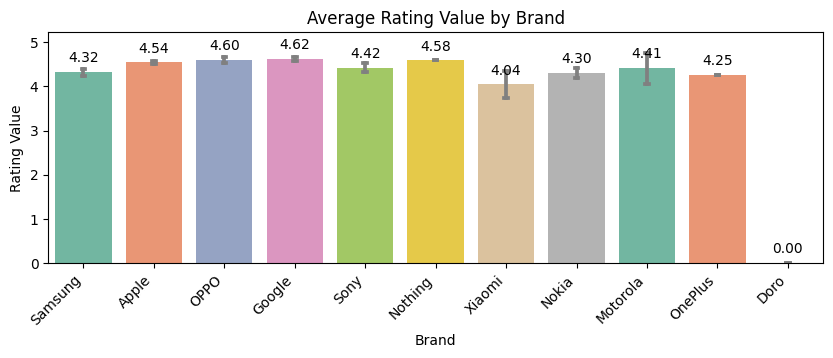

In [42]:
#
# # (2)Represent data in flat file for onward/persistent ref.
#

plot_average_rating_by_brand(phone_details_list)


In [ ]:
#
# # Hypothetical db store (here done only in memory as db not portable)
#

# Create a database connection
conn = sqlite3.connect(":memory:")

# Call the create_phone_details_table() function to create the phone_details table
create_phone_details_table(conn)

# Call the insert_phone_details() function to insert the extracted phone details into the phone_details table
insert_phone_details(conn, phone_details_list)



# Execute a SELECT query on the phone_details table
c = conn.cursor()
c.execute("SELECT brand, model_family, star_rating, rating_value FROM phone_details")

# Fetch the results of the query and print them out
results = c.fetchall()
for row in results:
    print(row)

# Close the database connection
conn.close()

('Samsung', 'Galaxy S23 Ultra', None, '4.25')
('Samsung', 'Galaxy S23', None, '5')
('Samsung', 'Galaxy S23 Plus', None, '5')
('Apple', 'iPhone 14', None, '4.3472')
('Apple', 'iPhone 14 Pro', None, '4.5901')
('OPPO', 'Find N2 Flip', None, '5')
('Google', 'Pixel 7 Pro', None, '4.7629')
('Samsung', 'Galaxy Z Fold4', None, '4.4458')
('Apple', 'iPhone 14 Pro Max', None, '4.5988')
('Apple', 'iPhone 14 Plus', None, '4.5846')
('Google', 'Pixel 7', None, '4.6709')
('Apple', 'iPhone 13', None, '4.5614')
('Sony', 'Xperia 1 IV', None, '4.2609')
('Samsung', 'Galaxy Z Flip4', None, '4.3543')
('Apple', 'iPhone 11', None, '4.6511')
('Samsung', 'Galaxy S22 Ultra', None, '4.395')
('Apple', 'iPhone 12 5G', None, '4.4874')
('Samsung', 'Galaxy S22', None, '3.9441')
('Apple', 'iPhone 13 mini', None, '4.4868')
('Samsung', 'Galaxy S21 FE 5G', None, '4.4048')
('Samsung', 'Galaxy A23 5G', None, '4.2745')
('Google', 'Pixel 6a', None, '4.5278')
('Samsung', 'Galaxy A53 5G', None, '4.2428')
('Nothing', 'Phone 1', N